In [ ]:
from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image
import cv2
import seaborn as sns; sns.set()
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
x_train  = x_train/255
x_test  = x_test/255

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:
one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [ ]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [ ]:
num_classes = 10

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(BatchNormalization(axis=3, name='bn_conv1'))
model.add(Activation('elu'))
model.add(Conv2D(32, (3, 3), padding='same',name='conv2'))
model.add(BatchNormalization(axis=3, name='bn_conv2'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same',name='conv3'))
model.add(BatchNormalization(axis=3, name='bn_conv3'))
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same',name='conv4'))
model.add(BatchNormalization(axis=3, name='bn_conv4'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), padding='same',name='conv5'))
model.add(BatchNormalization(axis=3, name='bn_conv5'))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3), padding='same',name='conv6'))
model.add(BatchNormalization(axis=3, name='bn_conv6'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('elu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0

In [ ]:
batch_size = 32
epochs = 60
model_history = model.fit(x_train, y_train, batch_size=batch_size,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/60
1562/1562 [==============================] - 32s 12ms/step - loss: 1.3289 - accuracy: 0.5394 - val_loss: 0.9055 - val_accuracy: 0.6849
Epoch 2/60
1562/1562 [==============================] - 11s 7ms/step - loss: 0.8565 - accuracy: 0.6994 - val_loss: 0.9289 - val_accuracy: 0.6871
Epoch 3/60
1562/1562 [==============================] - 11s 7ms/step - loss: 0.6829 - accuracy: 0.7603 - val_loss: 0.6906 - val_accuracy: 0.7609
Epoch 4/60
1562/1562 [==============================] - 11s 7ms/step - loss: 0.5697 - accuracy: 0.8016 - val_loss: 0.6084 - val_accuracy: 0.7877
Epoch 5/60
1562/1562 [==============================] - 11s 7ms/step - loss: 0.4812 - accuracy: 0.8322 - val_loss: 0.5802 - val_accuracy: 0.8035
Epoch 6/60
1562/1562 [==============================] - 11s 7ms/step - loss: 0.4027 - accuracy: 0.8586 - val_loss: 0.6295 - val_accuracy: 0.7946
Epoch 7/60
1562/1562 [==============================] - 11s 7ms/step - loss: 0.3399 - accuracy: 0.8809 - val_loss: 0.5652 - val_a

In [ ]:
model.save('M1.h5')

In [ ]:
from keras import models
model = models.load_model('M1.h5')

In [ ]:
predictions = model.predict(x_test)
predictions = one_hot_encoder.inverse_transform(predictions)
y_test = one_hot_encoder.inverse_transform(y_test)

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

In [ ]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(BatchNormalization(axis=3, name='bn_conv1'))
model.add(Activation('elu'))
model.add(Conv2D(32, (3, 3), padding='same',name='conv2'))
model.add(BatchNormalization(axis=3, name='bn_conv2'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same',name='conv3'))
model.add(BatchNormalization(axis=3, name='bn_conv3'))
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same',name='conv4'))
model.add(BatchNormalization(axis=3, name='bn_conv4'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), padding='same',name='conv5'))
model.add(BatchNormalization(axis=3, name='bn_conv5'))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3), padding='same',name='conv6'))
model.add(BatchNormalization(axis=3, name='bn_conv6'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('elu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)       

In [ ]:
from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau


batch_size = 32
epochs = 60



filepath = 'M1-weights.hdf5'
model_chk = ModelCheckpoint(filepath, monitor='val_loss', verbose=0,
                            save_best_only=True,
                            save_weights_only=True, mode='auto',
                            period=1)

csv_log = CSVLogger('M1-training.log')

model_history = model.fit(x_train, y_train, batch_size=batch_size,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[model_chk, csv_log])

Epoch 1/60
1562/1562 [==============================] - 12s 7ms/step - loss: 1.3276 - accuracy: 0.5386 - val_loss: 0.9605 - val_accuracy: 0.6630
Epoch 2/60
1562/1562 [==============================] - 11s 7ms/step - loss: 0.8518 - accuracy: 0.6998 - val_loss: 0.8027 - val_accuracy: 0.7154
Epoch 3/60
1562/1562 [==============================] - 11s 7ms/step - loss: 0.6769 - accuracy: 0.7613 - val_loss: 0.7643 - val_accuracy: 0.7382
Epoch 4/60
1562/1562 [==============================] - 11s 7ms/step - loss: 0.5614 - accuracy: 0.8040 - val_loss: 0.6169 - val_accuracy: 0.7876
Epoch 5/60
1562/1562 [==============================] - 11s 7ms/step - loss: 0.4708 - accuracy: 0.8360 - val_loss: 0.6262 - val_accuracy: 0.7896
Epoch 6/60
1562/1562 [==============================] - 11s 7ms/step - loss: 0.3953 - accuracy: 0.8617 - val_loss: 0.6103 - val_accuracy: 0.7949
Epoch 7/60
1562/1562 [==============================] - 11s 7ms/step - loss: 0.3352 - accuracy: 0.8826 - val_loss: 0.5973 - val_ac

In [ ]:
from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


# This time we will only use the test set:
_, (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype('float32')
x_test /= 255
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
num_classes = 10

y_test = np_utils.to_categorical(y_test, num_classes)

10000 test samples


In [ ]:
import os

weights_path = 'M1-weights.hdf5'
out_dir = 'M1-features'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(BatchNormalization(axis=3, name='bn_conv1'))
model.add(Activation('elu'))
model.add(Conv2D(32, (3, 3), padding='same',name='conv2'))
model.add(BatchNormalization(axis=3, name='bn_conv2'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same',name='conv3'))
model.add(BatchNormalization(axis=3, name='bn_conv3'))
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same',name='conv4'))
model.add(BatchNormalization(axis=3, name='bn_conv4'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), padding='same',name='conv5'))
model.add(BatchNormalization(axis=3, name='bn_conv5'))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3), padding='same',name='conv6'))
model.add(BatchNormalization(axis=3, name='bn_conv6'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('elu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

model.summary()
model.load_weights(weights_path)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 activation_16 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 activation_17 (Activation)  (None, 32, 32, 32)       

In [ ]:
import numpy as np

feat_extractor = Model(inputs=model.input,
                       outputs=model.get_layer('fc1').output)

features = feat_extractor.predict(x_test, batch_size=batch_size)

np.save(os.path.join(out_dir, 'fc1_features.npy'), features)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(features)
pca_features = pca.transform(features)

np.save(os.path.join(out_dir, 'fc1_features_pca_2dim.npy'), pca_features)

In [ ]:
tx, ty = pca_features[:,0], pca_features[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

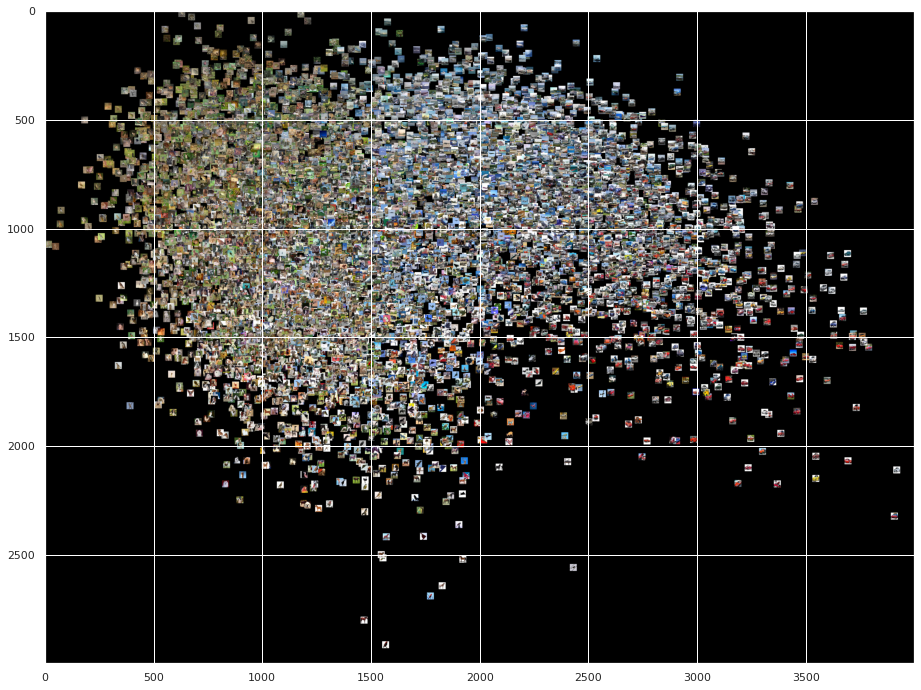

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(x_test):
    tile = Image.fromarray(np.uint8(x * 255))
    #tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]), int((height-max_dim) * ty[idx])))

%matplotlib inline
plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [ ]:
full_image.save(os.path.join(out_dir, "fc1_pca.jpg"))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(features)
pca_features = pca.transform(features)

np.save(os.path.join(out_dir, 'fc1_features_pca_50dim.npy'), pca_features)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE().fit_transform(pca_features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
np.save(os.path.join(out_dir, 'fc1_features_pca_50dim_tsne.npy'), tsne)

In [ ]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

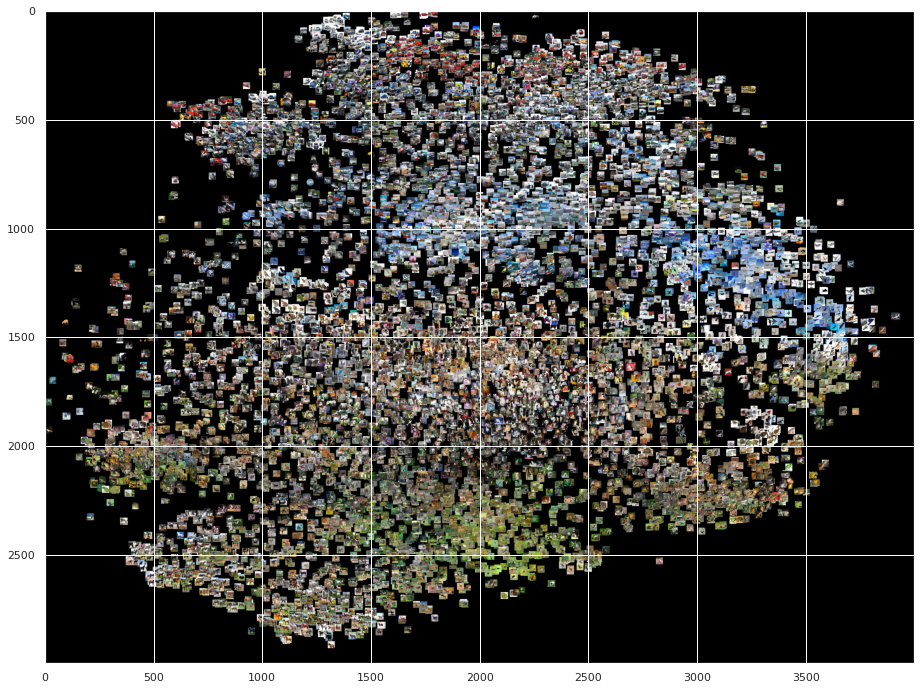

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(x_test):
    tile = Image.fromarray(np.uint8(x * 255))
    #tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]), int((height-max_dim) * ty[idx])))

%matplotlib inline
plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [ ]:
from sklearn.manifold import TSNE

features = np.load(os.path.join(out_dir, 'fc1_features.npy'))
tsne = TSNE().fit_transform(features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
np.save(os.path.join(out_dir, 'fc1_features_tsne_default.npy'), tsne)

In [ ]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

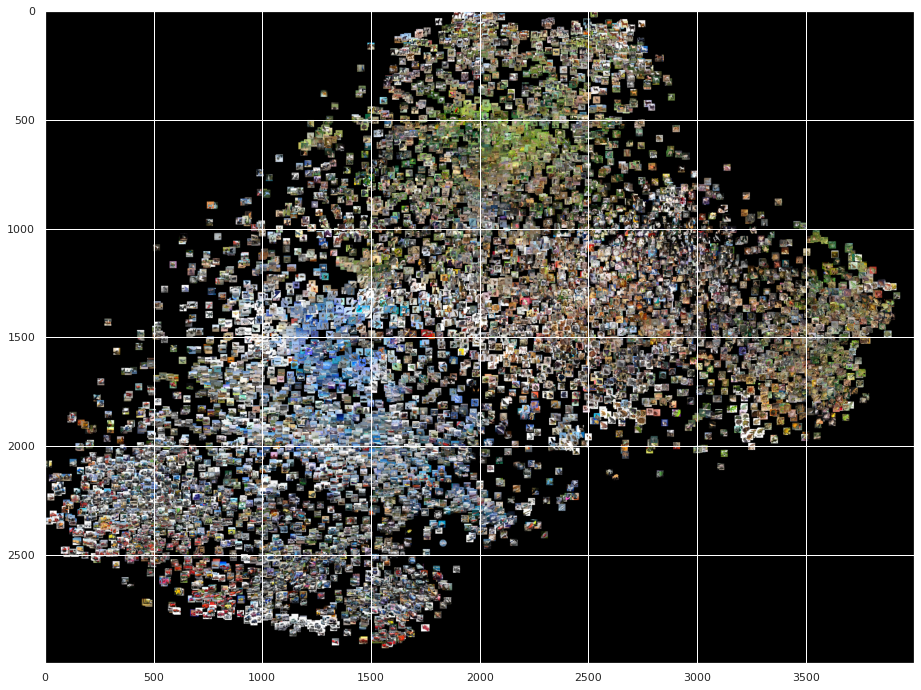

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(x_test):
    tile = Image.fromarray(np.uint8(x * 255))
    #tile = Image.open(img)
    rs = max(1, tile.width / max_dim, tile.height / max_dim)
    tile = tile.resize((int(tile.width / rs),
                        int(tile.height / rs)),
                       Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]),
                            int((height-max_dim) * ty[idx])))

%matplotlib inline
plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [ ]:
full_image.save(os.path.join(out_dir, "fc1_features_tsne_default.jpg"))

In [ ]:
# have to re-load cifar to get y_test back in its original form
_, (x_test, y_test) = cifar10.load_data()

y_test = np.asarray(y_test)

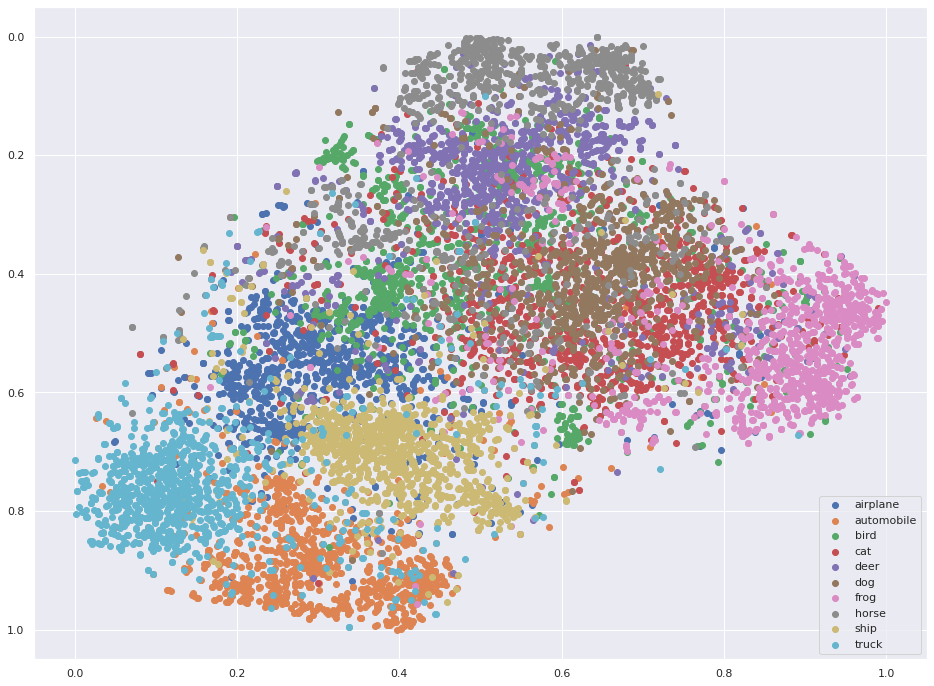

In [ ]:
plt.figure(figsize = (16,12))

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(len(classes)):
    y_i = y_test == i
    plt.scatter(tx[y_i[:, 0]], ty[y_i[:, 0]], label=classes[i])
plt.legend(loc=4)
plt.gca().invert_yaxis()
plt.savefig(os.path.join(out_dir, "fc1_features_tsne_default_pts.jpg"), bbox_inches='tight')
plt.show()

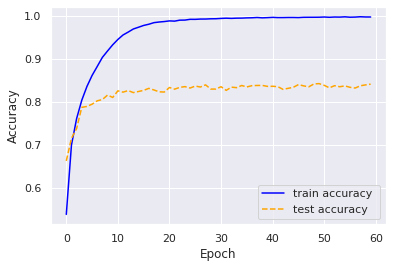

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(model_history.history['accuracy'],
         label='train accuracy ',
         c='blue', ls='-')
plt.plot(model_history.history['val_accuracy'],
         label='test accuracy ',
         c='orange',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

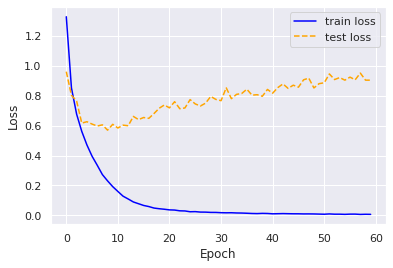

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(model_history.history['loss'],
         label='train loss',
         c='blue', ls='-')
plt.plot(model_history.history['val_loss'],
         label='test loss',
         c='orange',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

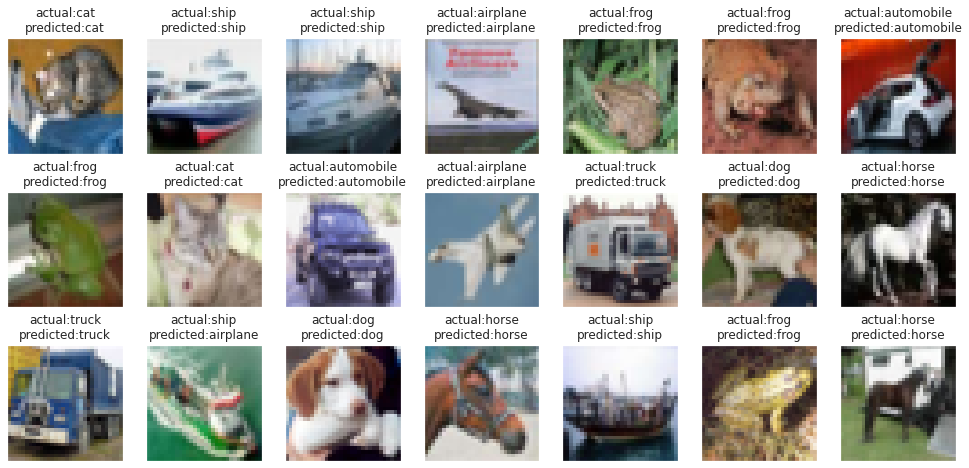

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + classes[y_test[index][0]] + '\n' 
                            + 'predicted:' + classes[predictions[index][0]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

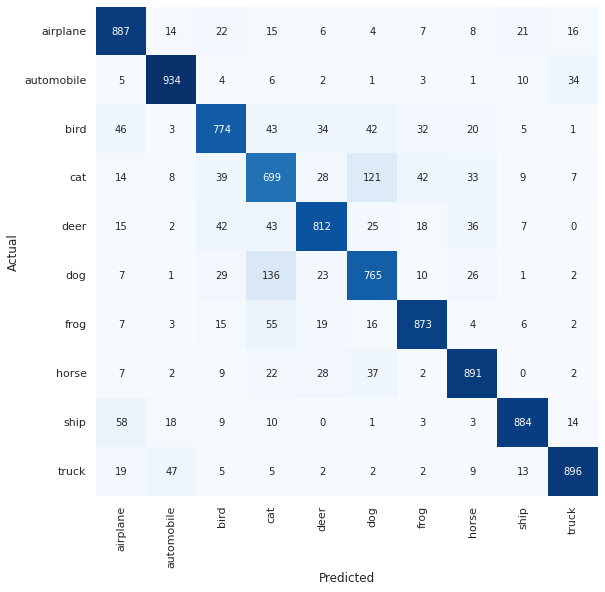

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes,fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()